# **Sexual and Gender Minority**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import regex as re
import seaborn as sns
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

## **About the Data**

The data used in this project was downloaded from Kaggle.com and was collected by the CDC. The Behavioral Risk Factor Surveillance System (BRFSS) is a national survey used to assess the health of U.S Residents of each state. The survey is done via telephone. The data used in this project comes from their 2015 data.

# **Data Analysis Questions**

**Q1**:
Is there an association between being queer identifying individuals and being diagnosed with depression or anxiety by a provider?

**Q2**: Do Bisexual indivdiuals have poorer mental health compared to their gay counterparts?

**Q3**:
Is there an association between being non-cis, the state, and  being diagnosed with depression or anxiety by a provider?

## **Overall Findings:**


- Bisexual People, bisexual women,specifically report a higher rate of days their mental health isn't good compared to gay people.
- People that that reported their sexuality to be other have a higher rate of depressive/anxious symptoms compared to other groups
- Non-binary people are more likely to experience more depressive/anxious symptoms compared to other gender minorities. Especially, in states like Georiga, North Dakota, and West Virgina

# **Load Data**

**Variable Information:**

- EDUCA: What is the highest grade or year of school you completed?
- SXORIENT: What is your sexual orientation?
- TRNSGNDR: Are you Transgender?
- GENHLTH: Would you say that in general your health is
- MENTHLTH: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?
- ADDEPEV2: (Ever told) you that you have a depressive disorder, including depression, major depression, dysthymia, or minor
depression?
- ADPLEASR: Over the last 2 weeks, how many days have you had little interest or pleasure in doing things?
- ADDOWN: Over the last 2 weeks, how many days have you felt down, depressed or hopeless?
- ADSLEEP: Over the last 2 weeks, how many days have you had trouble falling asleep or staying asleep or sleeping too much?
- ADENERGY: Over the last 2 weeks, how many days have you felt tired or had little energy?
- ADEAT1: Over the last 2 weeks, how many days have you had a poor appetite or eaten too much?
- ADFAIL: Over the last 2 weeks, how many days have you felt bad about yourself or that you were a failure or had let yourself or your family down?
- ADTHINK: Over the last 2 weeks, how many days have you had trouble concentrating on things, such as reading the newspaper or watching the TV?
- ADMOVE: Over the last 2 weeks, how many days have you moved or spoken so slowly that other people could have noticed? Or the opposite – being so fidgety or restless that you were moving around a lot more than usual?
- MISTMNT: Are you now taking medicine or receiving treatment from a doctor or other health professional for any type of mental health condition or emotional problem?
- ADANXEV:  Has a doctor or other healthcare provider EVER told you that you had an anxiety disorder (including acute stress disorder, anxiety, generalized anxiety disorder, obsessive-compulsive disorder, panic disorder, phobia, posttraumatic stress disorder, or social anxiety disorder)?



In [ ]:
cols = ['_STATE','SEX','MARITAL','EDUCA','SXORIENT','TRNSGNDR','GENHLTH','PHYSHLTH','MENTHLTH','POORHLTH','ADDEPEV2','DIABETE3','PREDIAB1','VETERAN3',
        'AVEDRNK2','DRNK3GE5','MAXDRNKS','ADPLEASR','ADDOWN','ADSLEEP','ADENERGY','ADEAT1','ADFAIL','ADTHINK','ADMOVE','MISTMNT','ADANXEV',
        'INCOME2','CVDCRHD4','CHCSCNCR','CHCOCNCR','HLTHPLN1','MEDCOST','BPMEDS','CVDINFR4','CHILDREN','INTERNET','EMPLOY1','EXERANY2']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/Projects/BFFRS/2015.csv',usecols=cols)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Data columns (total 39 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    441456 non-null  float64
 1   GENHLTH   441454 non-null  float64
 2   PHYSHLTH  441455 non-null  float64
 3   MENTHLTH  441456 non-null  float64
 4   POORHLTH  226964 non-null  float64
 5   HLTHPLN1  441456 non-null  float64
 6   MEDCOST   441455 non-null  float64
 7   BPMEDS    178188 non-null  float64
 8   CVDINFR4  441456 non-null  float64
 9   CVDCRHD4  441455 non-null  float64
 10  CHCSCNCR  441455 non-null  float64
 11  CHCOCNCR  441456 non-null  float64
 12  ADDEPEV2  441456 non-null  float64
 13  DIABETE3  441449 non-null  float64
 14  SEX       441456 non-null  float64
 15  MARITAL   441456 non-null  float64
 16  EDUCA     441456 non-null  float64
 17  VETERAN3  441450 non-null  float64
 18  EMPLOY1   441456 non-null  float64
 19  CHILDREN  441451 non-null  float64
 20  INCO

In [ ]:
df.head()

,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,MEDCOST,BPMEDS,CVDINFR4,CVDCRHD4,CHCSCNCR,CHCOCNCR,ADDEPEV2,DIABETE3,SEX,MARITAL,EDUCA,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,AVEDRNK2,DRNK3GE5,MAXDRNKS,EXERANY2,PREDIAB1,SXORIENT,TRNSGNDR,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV
0,1.0,5.0,15.0,18.0,10.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,4.0,2.0,8.0,88.0,3.0,2.0,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,3.0,88.0,88.0,NaN,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,6.0,2.0,3.0,88.0,1.0,1.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,4.0,15.0,88.0,88.0,1.0,2.0,NaN,7.0,2.0,2.0,1.0,2.0,3.0,2.0,2.0,4.0,2.0,7.0,88.0,99.0,2.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,5.0,30.0,30.0,30.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,3.0,2.0,1.0,4.0,2.0,8.0,1.0,8.0,2.0,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,5.0,20.0,88.0,30.0,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,5.0,2.0,8.0,88.0,77.0,1.0,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Cleaning**

**Unique Values**

In [ ]:
for col in df.columns:
  print('--------------------------------------------')
  unique_vals = df[col].unique()
  print(f'{col}:')
  print(f'{unique_vals}')
  print(f'Total Values: {len(unique_vals)}')

--------------------------------------------
_STATE:
[ 1.  2.  4.  5.  6.  8.  9. 10. 11. 12. 13. 15. 16. 17. 18. 19. 20. 21.
 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39.
 40. 41. 42. 44. 45. 46. 47. 48. 49. 50. 51. 53. 54. 55. 56. 66. 72.]
Total Values: 53
--------------------------------------------
GENHLTH:
[ 5.  3.  4.  2.  1.  7.  9. nan]
Total Values: 8
--------------------------------------------
PHYSHLTH:
[15. 88. 30. 20.  8. 77.  2. 14.  5. 99.  6. 28.  1.  7. 10.  3. 17.  4.
 19. 21. 25. 12. 27. 22. 29. 24.  9. 16. 13. 18. 23. 11. 26. nan]
Total Values: 34
--------------------------------------------
MENTHLTH:
[18. 88. 30.  3. 99.  2.  5. 15. 77. 10.  1.  6.  7. 20. 25. 29.  4.  8.
 21. 14. 26.  9. 16. 28. 11. 17. 12. 23. 24. 13. 27. 22. 19.]
Total Values: 33
--------------------------------------------
POORHLTH:
[10. nan 88. 30.  8. 77.  2. 14.  5. 15. 99.  7. 12. 25.  1.  3. 20.  4.
 17. 26.  9. 29.  6. 28. 21. 16. 23. 27. 11. 24. 13. 18. 22. 19.

## **Transformations**

**States**

I need to map the BFRSS states to the numbers in the codebook

In [ ]:
nums = [1,2,4,5,6,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56,66,72,]

In [ ]:
abbr =['AL', 'AR', 'AZ', 'AK','CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'GU','PR']

abbrs = dict(zip(nums,abbr))

print(abbrs)

{1: 'AL', 2: 'AR', 4: 'AZ', 5: 'AK', 6: 'CA', 8: 'CO', 9: 'CT', 10: 'DC', 11: 'DE', 12: 'FL', 13: 'GA', 15: 'HI', 16: 'IA', 17: 'ID', 18: 'IL', 19: 'IN', 20: 'KS', 21: 'KY', 22: 'LA', 23: 'MA', 24: 'MD', 25: 'ME', 26: 'MI', 27: 'MN', 28: 'MO', 29: 'MS', 30: 'MT', 31: 'NC', 32: 'ND', 33: 'NE', 34: 'NH', 35: 'NJ', 36: 'NM', 37: 'NV', 38: 'NY', 39: 'OH', 40: 'OK', 41: 'OR', 42: 'PA', 44: 'RI', 45: 'SC', 46: 'SD', 47: 'TN', 48: 'TX', 49: 'UT', 50: 'VA', 51: 'VT', 53: 'WA', 54: 'WI', 55: 'WV', 56: 'WY', 66: 'GU', 72: 'PR'}


In [ ]:
df['_STATE'] = df['_STATE'].replace(abbrs)

**Demographics Data**

In [ ]:
df['SEX'] = df['SEX'].replace({1:0,2:1})
df['MARITAL'] = df['MARITAL'].replace({1:'Marr',2:'Divorced',3:'Widowed',4:'Seperated',5:'NevMarr',6:'Partnered_unmarr',9:np.nan})
df['CHILDREN'] = df['CHILDREN'].replace({88:0,77:np.nan,99:np.nan})
df['CHILDREN'] = df['CHILDREN'].replace({2:0,7:np.nan,9:np.nan})

In [ ]:
df['VETERAN3'] = df['VETERAN3'].replace({2:0,7:np.nan,9:np.nan})

In [ ]:
df['EDUCA'] = df['EDUCA'].replace({9:np.nan})
df.EDUCA[df['EDUCA'] == 1] = 'Never Attended School'
df.EDUCA[df['EDUCA'] == 2] = 'Elementary'
df.EDUCA[df['EDUCA'] == 3] = 'Some high school'
df.EDUCA[df['EDUCA'] == 4] = 'High school graduate'
df.EDUCA[df['EDUCA'] == 5] = 'Some college or technical school'
df.EDUCA[df['EDUCA'] == 6] = 'College graduate'

**Income Data**

In [ ]:
df['INCOME2'] = df['INCOME2'].replace({77:np.nan,99:np.nan})
df.INCOME2[df['INCOME2'] == 1] = 'Less Than $10,000'
df.INCOME2[df['INCOME2'] == 2] = 'Less Than $15,000'
df.INCOME2[df['INCOME2'] == 3] = 'Less Than $20,000'
df.INCOME2[df['INCOME2'] == 4] = 'Less Than $25,000'
df.INCOME2[df['INCOME2'] == 5] = 'Less Than $35,000'
df.INCOME2[df['INCOME2'] == 6] = 'Less Than $50,000'
df.INCOME2[df['INCOME2'] == 7] = 'Less Than $75,000'
df.INCOME2[df['INCOME2'] == 8] = '$75,000 or More'

**Sexual Orientation and Gender Identity**

In [ ]:
df['SXORIENT'] = df['SXORIENT'].replace({1:'Str8',2:'Gay',3:'Bi',4:'Other',9:np.nan,7:np.nan})

In [ ]:
df['TRNSGNDR'] = df['TRNSGNDR'].replace({1:'M->F',2:'F->M',3:'Non-Binary',4:'Cis',9:np.nan,7:np.nan})

**Depression Data**

In [ ]:
df['ADDEPEV2'] = df['ADDEPEV2'].replace({2:0,7:np.nan,9:np.nan})
for col in df.iloc[:,29:]:
  df[col] = df[col].replace({88:0,77:np.nan,99:np.nan})
df['MISTMNT'] = df['MISTMNT'].replace({2:0,7:np.nan,9:np.nan})
df['ADANXEV'] = df['ADANXEV'].replace({2:0,7:np.nan,9:np.nan})

**Health**

In [ ]:
df['GENHLTH'] = df['GENHLTH'].replace({9:np.nan,7:np.nan})
df['GENHLTH'] = df['GENHLTH'].apply(lambda x: 1 if x < 4 else 0)
df['PHYSHLTH'] = df['PHYSHLTH'].replace({88:0,77:np.nan,99:np.nan})
df['MENTHLTH'] = df['MENTHLTH'].replace({88:0,77:np.nan,99:np.nan})
df['POORHLTH'] = df['POORHLTH'].replace({88:0,77:np.nan,99:np.nan})

In [ ]:
df['DIABETE3'] = df['DIABETE3'].replace({7:np.nan,9:np.nan})
df['DIABETE3'] = df['DIABETE3'].apply(lambda x: 1 if x <3 else 0)


In [ ]:
df['CVDCRHD4'] = df['CVDCRHD4'].replace({2:0,7:np.nan,9:np.nan})
df.rename(columns={'CVDCRHD4':'HRTDOAGIN'},inplace=True)

In [ ]:
df['CVDINFR4'] = df['CVDINFR4'].replace({2:0,7:np.nan,9:np.nan})

In [ ]:
df['PREDIAB1'] = df['PREDIAB1'].replace({2:1,3:0,7:np.nan,9:np.nan})
df['CHCSCNCR'] = df['CHCSCNCR'].replace({2:0,7:np.nan,9:np.nan})
df['CHCOCNCR'] = df['CHCOCNCR'].replace({2:0,7:np.nan,9:np.nan})

**Alcohol**

In [ ]:
df['AVEDRNK2'] = df['AVEDRNK2'].replace({77:np.nan,99:np.nan})
df['DRNK3GE5'] = df['DRNK3GE5'].replace({88:0,77:np.nan,99:np.nan})
df['MAXDRNKS'] = df['MAXDRNKS'].replace({77:np.nan,99:np.nan})

**Medical Bills and Meds**

In [ ]:
df['HLTHPLN1'] = df['HLTHPLN1'].replace({2:0,7:np.nan,9:np.nan})
df['MEDCOST'] = df['MEDCOST'].replace({2:0,7:np.nan,9:np.nan})
df['BPMEDS'] = df['BPMEDS'].replace({2:0,7:np.nan,9:np.nan})

## **Duplicates**

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(418453, 39)

## **Missing Data**

In [ ]:
print("Precentage of data missing")
print('--------------------------------------------')
for col in df.columns:
  nans = df[col].isna().sum()
  missing_ = np.round_((nans/441456) * 100,decimals=1)
  if missing_ >= 50:
    print(f'{col}: %{missing_}')
  else:
    continue
print('--------------------------------------------')
print(df['SXORIENT'].value_counts())
print('--------------------------------------------')
print(df['MARITAL'].value_counts())

Precentage of data missing
--------------------------------------------
BPMEDS: %55.4
AVEDRNK2: %50.2
DRNK3GE5: %50.2
MAXDRNKS: %51.1
PREDIAB1: %76.9
SXORIENT: %60.3
TRNSGNDR: %59.8
ADPLEASR: %90.4
ADDOWN: %90.3
ADSLEEP: %90.3
ADENERGY: %90.3
ADEAT1: %90.3
ADFAIL: %90.3
ADTHINK: %90.3
ADMOVE: %90.3
MISTMNT: %90.2
ADANXEV: %90.2
--------------------------------------------
Str8     147255
Bi         2261
Gay        2237
Other       581
Name: SXORIENT, dtype: int64
--------------------------------------------
Marr                213726
NevMarr              66340
Divorced             58622
Widowed              55147
Partnered_unmarr     12583
Seperated             8956
Name: MARITAL, dtype: int64


**Data Imputation With the Median**

In [ ]:
for col in df.columns:
  if df[col].dtype != 'object':
    df[col].fillna(df[col].median(),inplace=True)

df['SXORIENT'].fillna('Str8',inplace=True)
df['MARITAL'].fillna('Marr',inplace=True)

In [ ]:
def hypothesis_decision(pvalue):
  if pvalue < 0.05:
    print(f'We Reject the null hypothesis since our p-value ({np.round_(pvalue,4)}) is less than 0.05')
    print(f'We accept the alternative hypothesis')

  else:
    print(f"We Reject the alternative hypothesis since our p-value({np.round_(pvalue,4)}) is not less than 0.05")

# **Question 1**
Is there an association between being non-heterosexual and being diagnosed with depression or anxiety by a provider?

Groupby sex and sexual orientation

In [ ]:
sxorient_gp = df.groupby(['SEX','SXORIENT'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '')

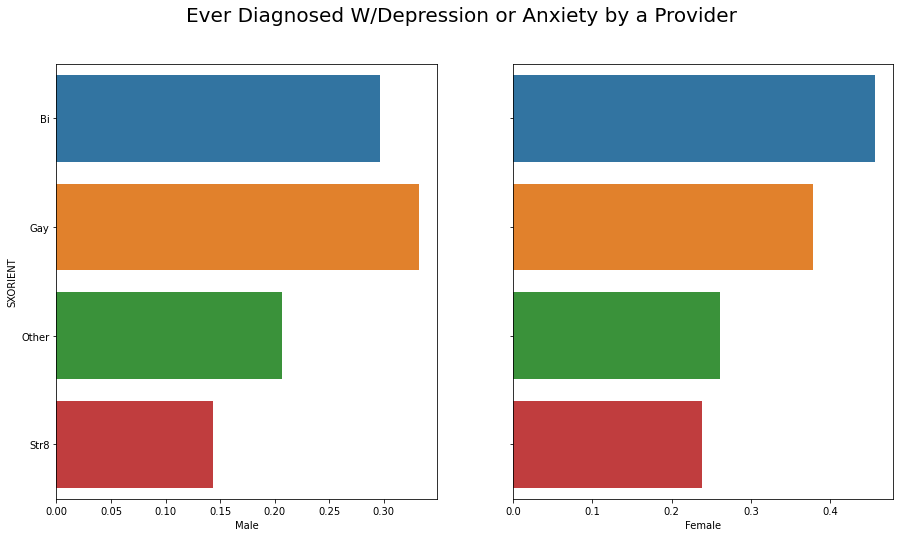

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize=(15,8),sharey=True)
fig.suptitle("Ever Diagnosed W/Depression or Anxiety by a Provider",fontsize=20)
# Male
sxorient_hlth = sxorient_gp
x2 = sxorient_hlth['ADDEPEV2'].mean()[0].values
y2 = sxorient_hlth['ADDEPEV2'].mean()[0].index
sns.barplot(x2,y2,ax=ax1)
ax1.set_xlabel('Male')


# Female
x4 = sxorient_hlth['ADDEPEV2'].mean()[1].values
y4 = sxorient_hlth['ADDEPEV2'].mean()[1].index
sns.barplot(x4,y4,ax=ax2)
ax2.set_xlabel('Female')
ax2.set_ylabel('')


Plotted Depression Variables

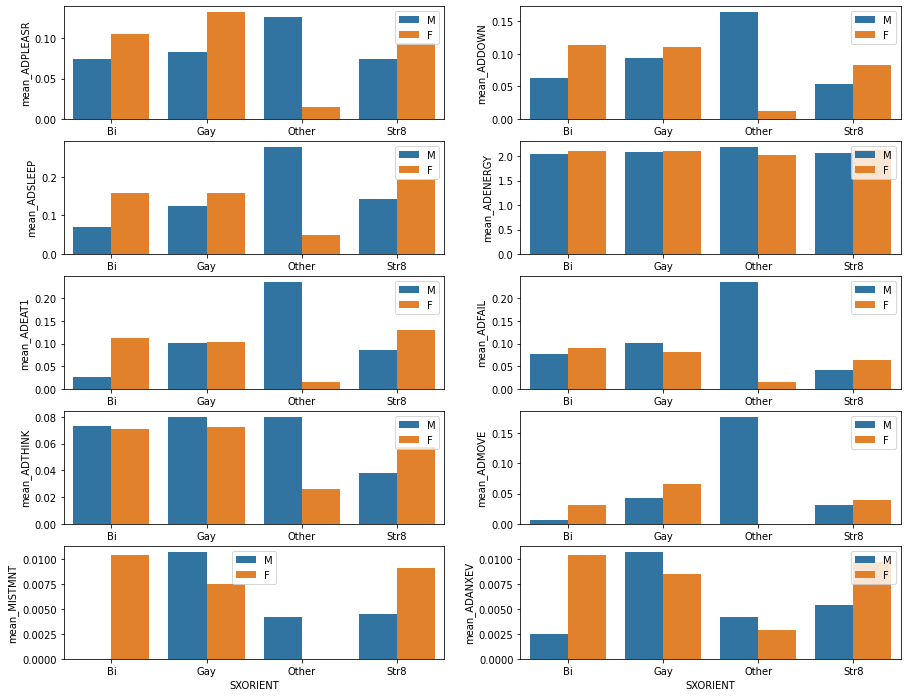

In [ ]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10)) = plt.subplots(ncols=2,nrows=5,figsize=(15,12),sharey=False)
axs = [(ax1,'ADPLEASR'),(ax2,'ADDOWN'),(ax3,'ADSLEEP'),(ax4,'ADENERGY'),
        (ax5,'ADEAT1'),(ax6,'ADFAIL'),(ax7,'ADTHINK'),(ax8,'ADMOVE'),(ax9,'MISTMNT'),(ax10,'ADANXEV')]
for ax,col in axs:
  y_label = f'mean_{col}'
  dp_gp = df.groupby(['SXORIENT', 'SEX']).agg(y_label=(col, 'mean'))
  dp_gp = dp_gp.reset_index()
  sns.barplot(x='SXORIENT',y=dp_gp.iloc[:,-1],hue='SEX',ax=ax,data=dp_gp)
  ax.set_ylabel(y_label)
  h, l = ax.get_legend_handles_labels()
  ax.legend(h,['M','F'])

It seems like those who identify as other may have higher rates of depressive/anxious symptoms. Other could mean pansexual,asexual, metrosexual,etc. No way of knowing without the data.

# **Question 2**:
Do Bisexual indivdiuals have pooerer mental health compared to their gay counterparts?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '')

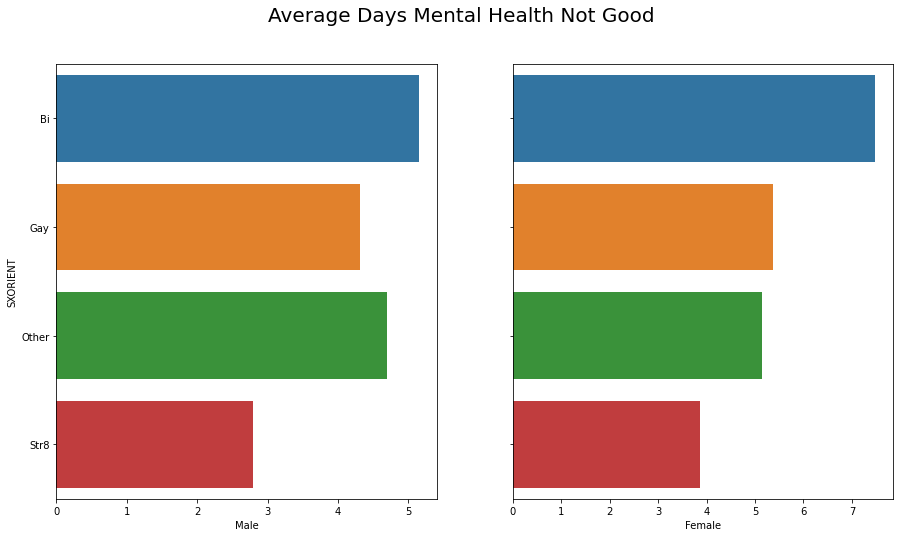

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize=(15,8),sharey=True)
fig.suptitle("Average Days Mental Health Not Good",fontsize = 20)
# Male
x1 = sxorient_hlth['MENTHLTH'].mean()[0].values
y1 = sxorient_hlth['MENTHLTH'].mean()[0].index
sns.barplot(x1,y1,ax=ax1)
ax1.set_xlabel('Male')


# Female
x3 = sxorient_hlth['MENTHLTH'].mean()[1].values
y3 = sxorient_hlth['MENTHLTH'].mean()[1].index
sns.barplot(x3,y3,ax=ax2)
ax2.set_xlabel('Female')
ax2.set_ylabel('')

## **Question 2a**

I want to determine if there is a significant difference between the numbers of reported days of poor mental health between bisexual people and gay people

### **Hypothesis:**
Bisexual people will have a higher mean of reported days of poor mental health compared to gay people?

We don't have a normal distribution with the data at hand. However, because the dataset is large enough greater than 30 samples, using central limit theorm we can sample the dataset to approximate a normal distribution with the sample means.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.24438521456913065 0.19790085800723559


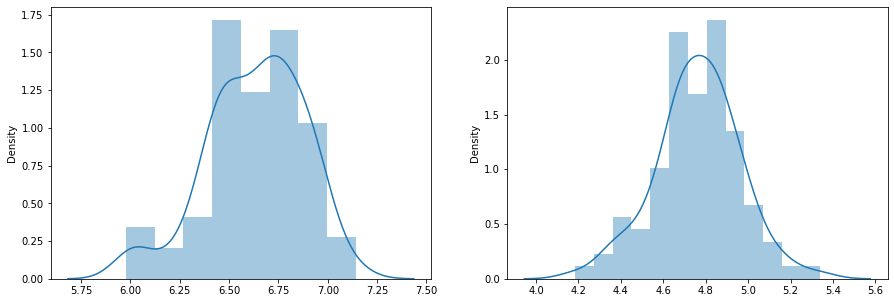

In [ ]:
bi_df = df[df['SXORIENT'] == 'Bi']
gay_df = df[df['SXORIENT'] == 'Gay']
CLT_bi = []
CLT_gay = []
for i in range(0,100):
  CLT_bi.append(bi_df['MENTHLTH'].sample(1000).mean())
  CLT_gay.append(gay_df['MENTHLTH'].sample(1000).mean())
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.distplot(CLT_bi,ax=ax1)
sns.distplot(CLT_gay,ax=ax2)
print(np.std(CLT_bi),np.std(CLT_gay))

In [ ]:
from scipy.stats import ttest_ind as T_test

stat,pvalue = T_test(bi_df['MENTHLTH'],gay_df['MENTHLTH'],equal_var=False,alternative='greater')

hypothesis_decision(pvalue)
bi_mean = np.round_(np.mean(bi_df['MENTHLTH']),2)
bi_std = np.round_(np.std(bi_df['MENTHLTH']),2)
gay_mean = np.round_(np.mean(gay_df['MENTHLTH']),2)
gay_std = np.round_(np.std(gay_df['MENTHLTH']),2)

print(f'''\nA two sample t-test was conducted assuming normality of the distributions of the mean,
with sample sizes {len(bi_df)} and {len(gay_df)} amongst bi (u={bi_mean},std={bi_std}) and gay (u={gay_mean},std={gay_std}) individuals,respecfully.
The t-test statistic is t={stat} and the dgrees of freedom is df={(len(bi_df)+len(gay_df))-2}
and the p-value={np.round_(pvalue,4)}. This indicates bi individuals have a significanly greater
average number of days they report poor mental health compared to gay people at the alpha= 0.05 level.''' )

We Reject the null hypothesis since our p-value (0.0) is less than 0.05
We accept the alternative hypothesis

A two sample t-test was conducted assuming normality of the distributions of the mean, 
with sample sizes 2261 and 2237 amongst bi (u=6.64,std=9.81) and gay (u=4.76,std=8.64) individuals,respecfully. 
The t-test statistic is t=6.826320340901352 and the dgrees of freedom is df=4496
and the p-value=0.0. This indicates bi individuals have a significanly greater
average number of days they report poor mental health compared to gay people at the alpha= 0.05 level.


# **Question 3**:
Is there an association between being non-cis individuals,the state, and  being diagnosed with depression or anxiety by a provider?

In [ ]:
trns_gp = df.groupby(['TRNSGNDR'])

In [ ]:
trns_gp.mean()

,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,MEDCOST,BPMEDS,CVDINFR4,HRTDOAGIN,CHCSCNCR,CHCOCNCR,ADDEPEV2,DIABETE3,SEX,VETERAN3,EMPLOY1,CHILDREN,INTERNET,AVEDRNK2,DRNK3GE5,MAXDRNKS,EXERANY2,PREDIAB1,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV
TRNSGNDR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cis,0.808527,4.359984,3.357733,2.705781,0.930956,0.095968,0.932075,0.060503,0.060613,0.100528,0.107111,0.204243,0.145548,0.574537,0.135635,3.974858,0.309792,1.217370,2.073447,0.541531,2.591632,1.291923,0.016848,0.063970,0.057699,0.140123,2.089872,0.086900,0.047278,0.042783,0.031178,0.006102,0.007240
F->M,0.784810,5.434599,4.746835,3.426160,0.864979,0.101266,0.936709,0.046414,0.059072,0.059072,0.080169,0.261603,0.156118,0.658228,0.097046,4.345992,0.514768,1.303797,2.012658,0.417722,2.383966,1.396624,0.033755,0.071730,0.050633,0.075949,2.029536,0.029536,0.054852,0.008439,0.037975,0.016878,0.012658
M->F,0.770083,4.675900,3.808864,3.576177,0.922438,0.124654,0.916898,0.091413,0.080332,0.060942,0.080332,0.254848,0.185596,0.263158,0.204986,4.146814,0.229917,1.288089,2.487535,0.747922,2.867036,1.263158,0.022161,0.141274,0.041551,0.132964,2.055402,0.132964,0.080332,0.091413,0.127424,0.008310,0.005540
Non-Binary,0.681818,5.058442,4.597403,4.136364,0.876623,0.142857,0.896104,0.103896,0.097403,0.077922,0.064935,0.311688,0.162338,0.500000,0.155844,4.292208,0.298701,1.318182,2.883117,0.941558,3.025974,1.370130,0.038961,0.538961,0.558442,0.759740,2.467532,1.149351,0.474026,0.162338,0.448052,0.019481,0.019481


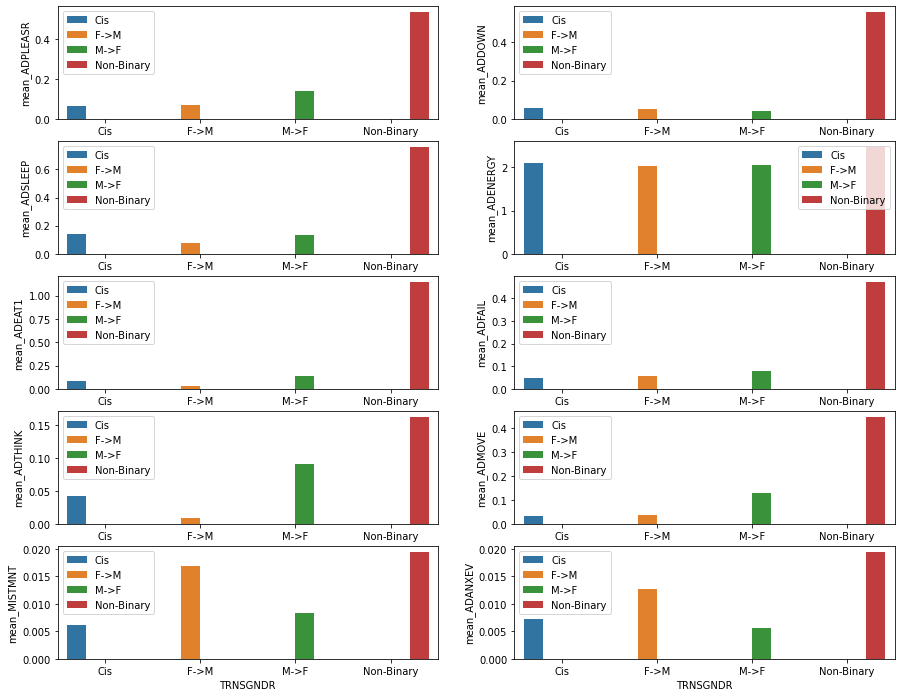

In [ ]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10)) = plt.subplots(ncols=2,nrows=5,figsize=(15,12),sharey=False)
axs = [(ax1,'ADPLEASR'),(ax2,'ADDOWN'),(ax3,'ADSLEEP'),(ax4,'ADENERGY'),
        (ax5,'ADEAT1'),(ax6,'ADFAIL'),(ax7,'ADTHINK'),(ax8,'ADMOVE'),(ax9,'MISTMNT'),(ax10,'ADANXEV')]
for ax,col in axs:
  y_label = f'mean_{col}'
  dp_gp = df.groupby(['TRNSGNDR']).agg(y_label=(col, 'mean'))
  dp_gp = dp_gp.reset_index()
  sns.barplot(x='TRNSGNDR',y=dp_gp.iloc[:,-1],hue='TRNSGNDR',ax=ax,data=dp_gp)
  ax.set_ylabel(y_label)
  h, l = ax.get_legend_handles_labels()
  ax.legend(h,['Cis','F->M','M->F','Non-Binary'])

# **States**

In [ ]:
state_gp = df.groupby(['_STATE'])

In [ ]:
state_gp.mean().iloc[:,:22].head()

,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,MEDCOST,BPMEDS,CVDINFR4,HRTDOAGIN,CHCSCNCR,CHCOCNCR,ADDEPEV2,DIABETE3,SEX,VETERAN3,EMPLOY1,CHILDREN,INTERNET,AVEDRNK2,DRNK3GE5,MAXDRNKS,EXERANY2
_STATE,,,,,,,,,,,,,,,,,,,,,,
AK,0.695319,5.806845,3.763179,3.920732,0.937254,0.105429,0.941188,0.094807,0.092054,0.118017,0.120574,0.210464,0.194729,0.629819,0.154209,4.840480,0.250393,1.369001,2.018489,0.401652,2.316483,1.373918
AL,0.731341,5.363126,4.258612,3.664535,0.907881,0.147573,0.933064,0.071503,0.075418,0.119389,0.105689,0.236561,0.183977,0.613779,0.137787,4.475992,0.293189,1.319024,2.115605,0.405402,2.421712,1.325287
AR,0.829607,4.051797,3.240872,2.632890,0.886216,0.129635,0.899802,0.041891,0.042174,0.050099,0.084348,0.161053,0.108973,0.534956,0.161902,3.418907,0.493348,1.155109,2.176620,0.729408,2.882253,1.243136
AZ,0.798629,4.528683,3.344059,2.815245,0.922854,0.107873,0.927074,0.064223,0.060530,0.151919,0.123302,0.192800,0.156007,0.586839,0.161282,4.455756,0.353290,1.223922,1.996703,0.390083,2.382962,1.252802
CA,0.810239,4.198825,3.794713,2.839026,0.896265,0.123626,0.912547,0.037012,0.038187,0.074444,0.078556,0.155602,0.123626,0.519765,0.097272,3.516156,0.436173,1.296601,2.217625,0.575325,2.739908,2.168023


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 [Text(0, 0, 'AK'),
  Text(1, 0, 'AL'),
  Text(2, 0, 'AR'),
  Text(3, 0, 'AZ'),
  Text(4, 0, 'CA'),
  Text(5, 0, 'CO'),
  Text(6, 0, 'CT'),
  Text(7, 0, 'DC'),
  Text(8, 0, 'DE'),
  Text(9, 0, 'FL'),
  Text(10, 0, 'GA'),
  Text(11, 0, 'GU'),
  Text(12, 0, 'HI'),
  Text(13, 0, 'IA'),
  Text(14, 0, 'ID'),
  Text(15, 0, 'IL'),
  Text(16, 0, 'IN'),
  Text(17, 0, 'KS'),
  Text(18, 0, 'KY'),
  Text(19, 0, 'LA'),
  Text(20, 0, 'MA'),
  Text(21, 0, 'MD'),
  Text(22, 0, 'ME'),
  Text(23, 0, 'MI'),
  Text(24, 0, 'MN'),
  Text(25, 0, 'MO'),
  Text(26, 0, 'MS'),
  Text(27, 0, 'MT'),
  Text(28, 0, 'NC'),
  Text(29, 0, 'ND'),
  Text(30, 0, 'NE'),
  Text(31, 0, 'NH'),
  Text(32, 0, 'NJ'),
  Text(33, 0, 'NM'),
  Text(34, 0, 'NV'),
  Text(35, 0, 'NY'),
  Text(3

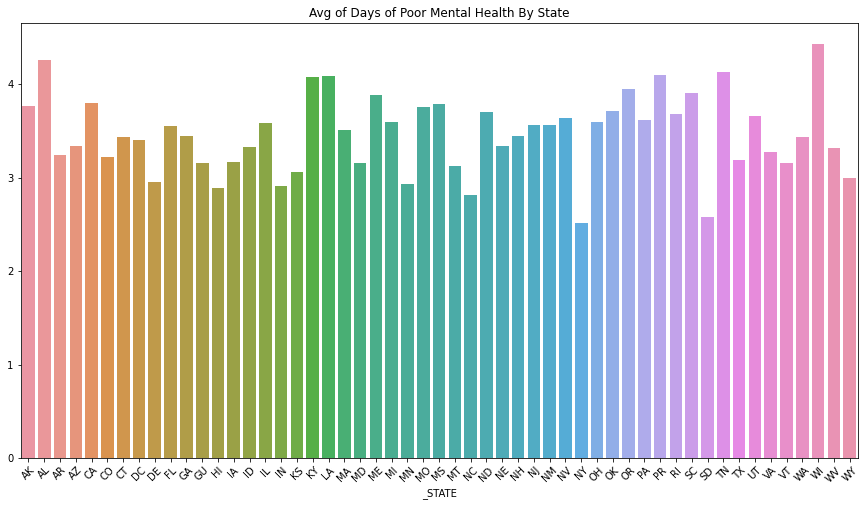

In [ ]:
fig = plt.subplots(ncols=1,nrows=1,figsize=(15,8))
MH =state_gp.mean()['MENTHLTH']
plt.title('Avg of Days of Poor Mental Health By State')
sns.barplot(MH.index,MH.values)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='_STATE,TRNSGNDR'>

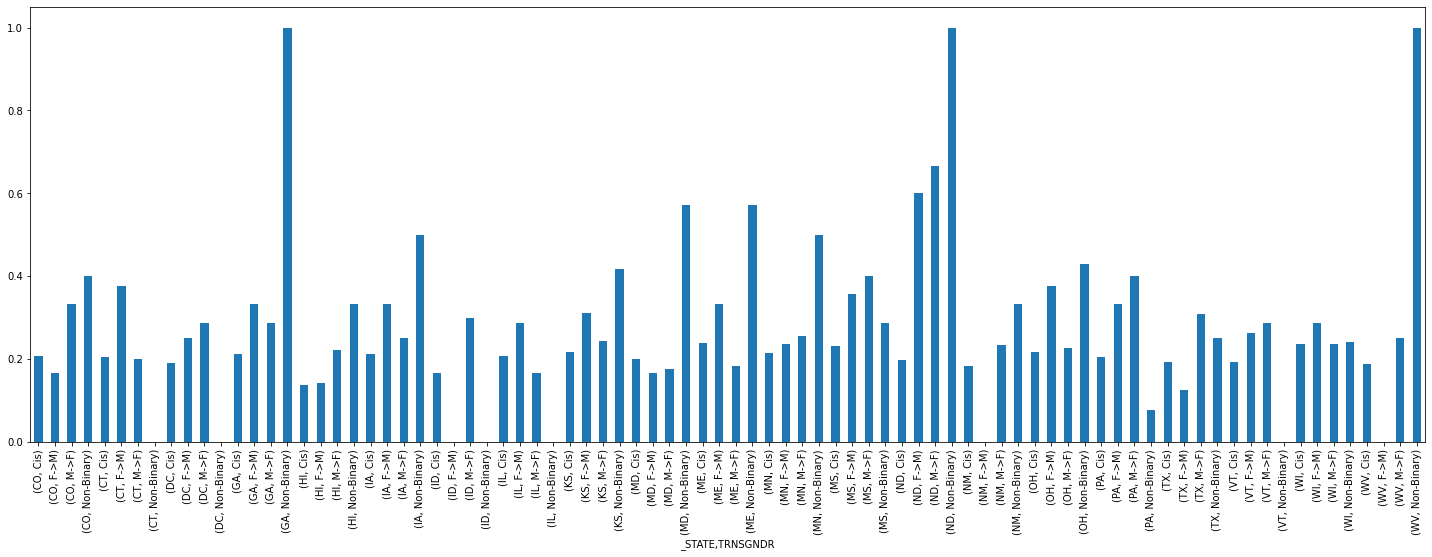

In [ ]:
fig = plt.subplots(ncols=1,nrows=1,figsize=(25,8))
df.groupby(['_STATE','TRNSGNDR']).mean()['ADDEPEV2'].plot(kind='bar')
# plt.xticks(rotation=45)

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/Projects/BFFRS/sgm_data.csv')